In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-05-15 14:05:15,316 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [7]:
labels_dict_BMI = {
    'Body mass index (BMI)': 'BMI'
}
labels_dict_MI_gallstones = {
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [8]:
phe_gs = decomposition.Phe_label_groups(d_PTVs.d['label_phe'])
phe_gs.add('fat-free')
phe_gs.add('fat', 'fat\s')
phe_gs.add('impedance')
phe_gs.add('reticulocyte')
phe_gs.add('meridian')
phe_gs.add('spirometry', r'fvc|fev1|pef')


2018-05-15 14:05:42,278 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_legend_BMI_1_PC1
2018-05-15 14:05:42,635 plot_contribution INFO     fat: 0.3457; fat-free: 0.1679; impedance: 0.0115; spirometry: 0.0045; reticulocyte: 0.0031
2018-05-15 14:05:42,693 plot_contribution DEBUG    Leg pred. mass (L)	Leg predicted mass (left)
2018-05-15 14:05:42,696 plot_contribution DEBUG    Leg pred. mass (R)	Leg predicted mass (right)
2018-05-15 14:05:42,699 plot_contribution DEBUG    Arm pred. mass (L)	Arm predicted mass (left)
2018-05-15 14:05:42,701 plot_contribution DEBUG    Trunk pred. mass	Trunk predicted mass
2018-05-15 14:05:42,703 plot_contribution DEBUG    Others	others
2018-05-15 14:05:42,706 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_legend_BMI_1_PC1.png
2018-05-15 14:05:43,160 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/fig

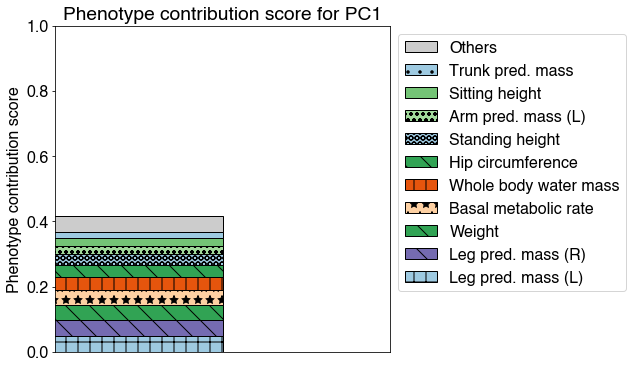

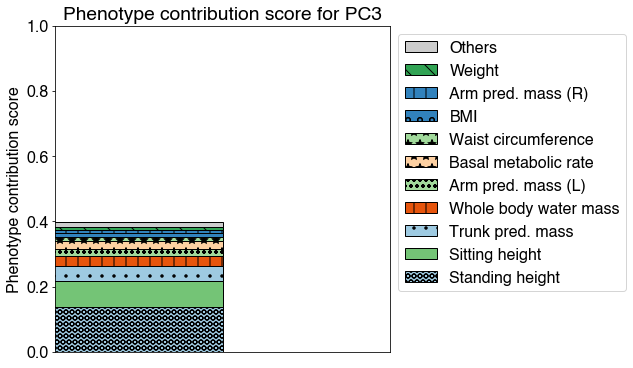

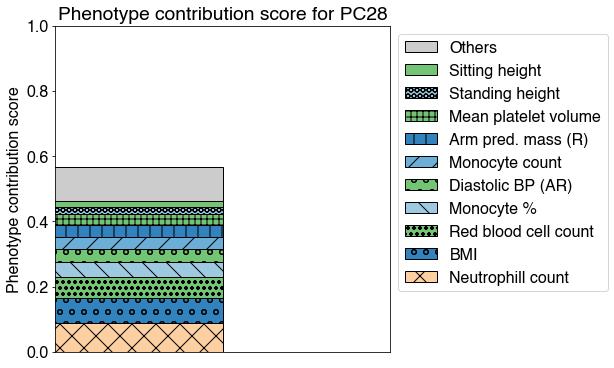

In [9]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_BMI, 
    out_dir, 
    fig_title = 'figS9', 
    d = d_PTVs, 
    topk = 3, 
    phe_gs=phe_gs,
)


2018-05-15 14:06:02,774 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_legend_MI_1_PC18
2018-05-15 14:06:02,999 plot_contribution DEBUG    FVC, Best measure	Forced vital capacity (FVC), Best measure
2018-05-15 14:06:03,003 plot_contribution DEBUG    FVC	Forced vital capacity (FVC)
2018-05-15 14:06:03,005 plot_contribution DEBUG    Nuc. red blood cell %	Nucleated red blood cell percentage
2018-05-15 14:06:03,008 plot_contribution DEBUG    High light scatter retic..	High light scatter reticulocyte count
2018-05-15 14:06:03,012 plot_contribution DEBUG    FEV1, Best measure	Forced expiratory volume in 1-second (FEV1), Best measure
2018-05-15 14:06:03,014 plot_contribution DEBUG    FEV1	Forced expiratory volume in 1-second (FEV1)
2018-05-15 14:06:03,017 plot_contribution DEBUG    Others	others
2018-05-15 14:06:03,021 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_legend_MI_1_PC18.png


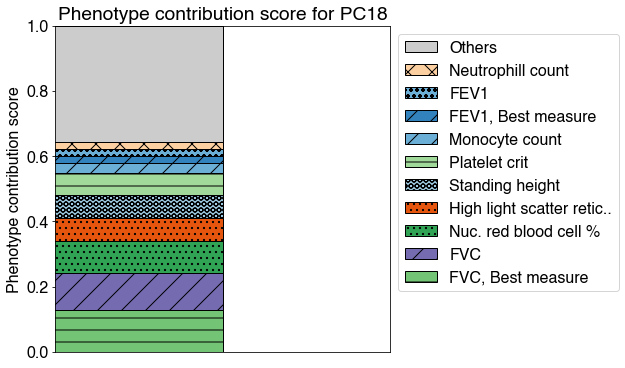

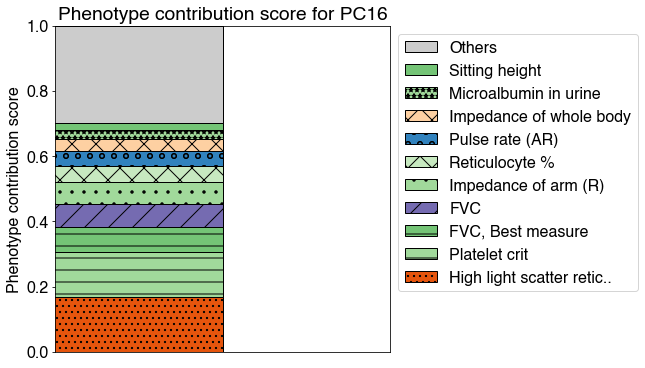

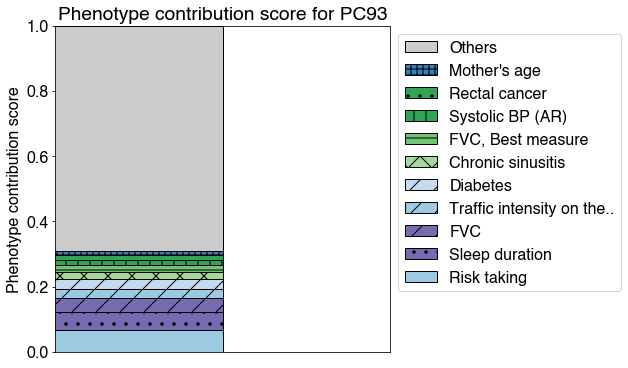

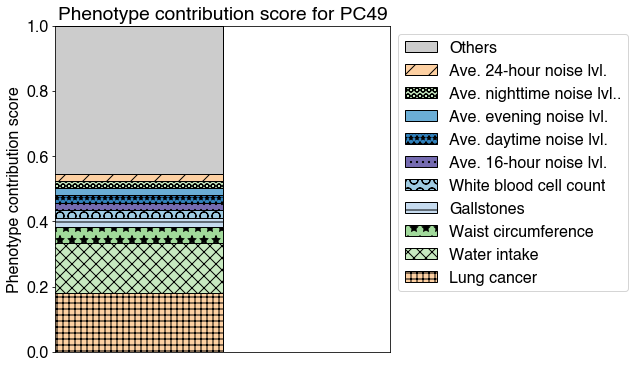

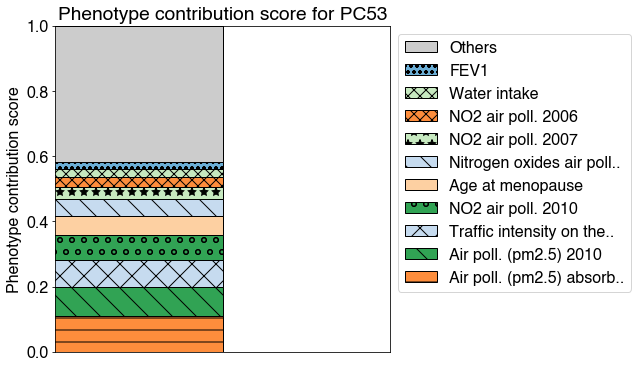

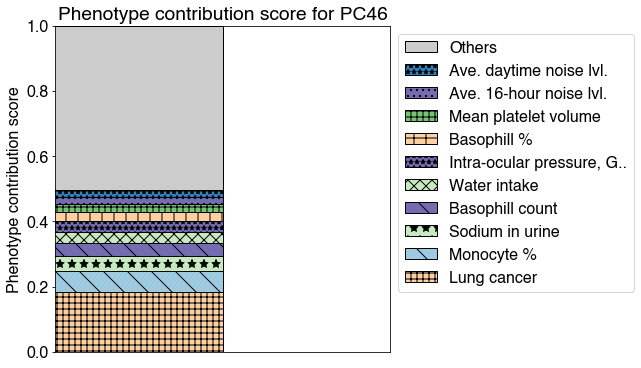

In [10]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_MI_gallstones, 
    out_dir, 
    fig_title = 'figS9', 
    d = d_PTVs, 
    topk = 3, 
)


2018-05-15 14:07:35,331 plot_contribution INFO     fat: 0.3378; fat-free: 0.1679
2018-05-15 14:07:35,558 plot_contribution INFO     fat: 0.2814; reticulocyte: 0.1452; fat-free: 0.1035
2018-05-15 14:07:35,647 plot_contribution INFO     fat-free: 0.0812; fat: 0.0534; reticulocyte: 0.0284; impedance: 0.0251; spirometry: 0.0243
2018-05-15 14:07:35,726 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_BMI.pdf
2018-05-15 14:07:36,670 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_BMI.png


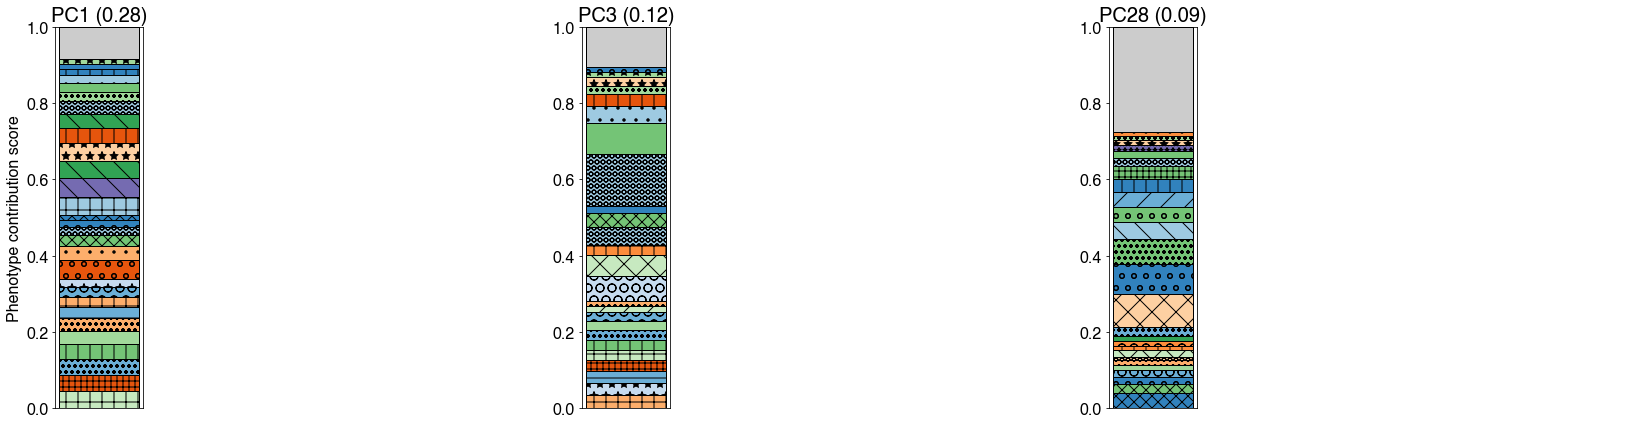

In [11]:
decomposition.plot_contribution_and_save(
    d = d_PTVs, 
    phe_or_gene = 'phe', 
    labels = labels_dict_BMI.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS9_BMI', 
    fig_spacing = 5, 
    contribution_thr=0.01, 
    pc_y_max = 1, 
    figsize=(28,7),
    phe_gs = phe_gs,
)

2018-05-15 14:07:53,630 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_MI_gallstones.pdf
2018-05-15 14:07:55,554 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS9_PTVsPhe/figS9_MI_gallstones.png


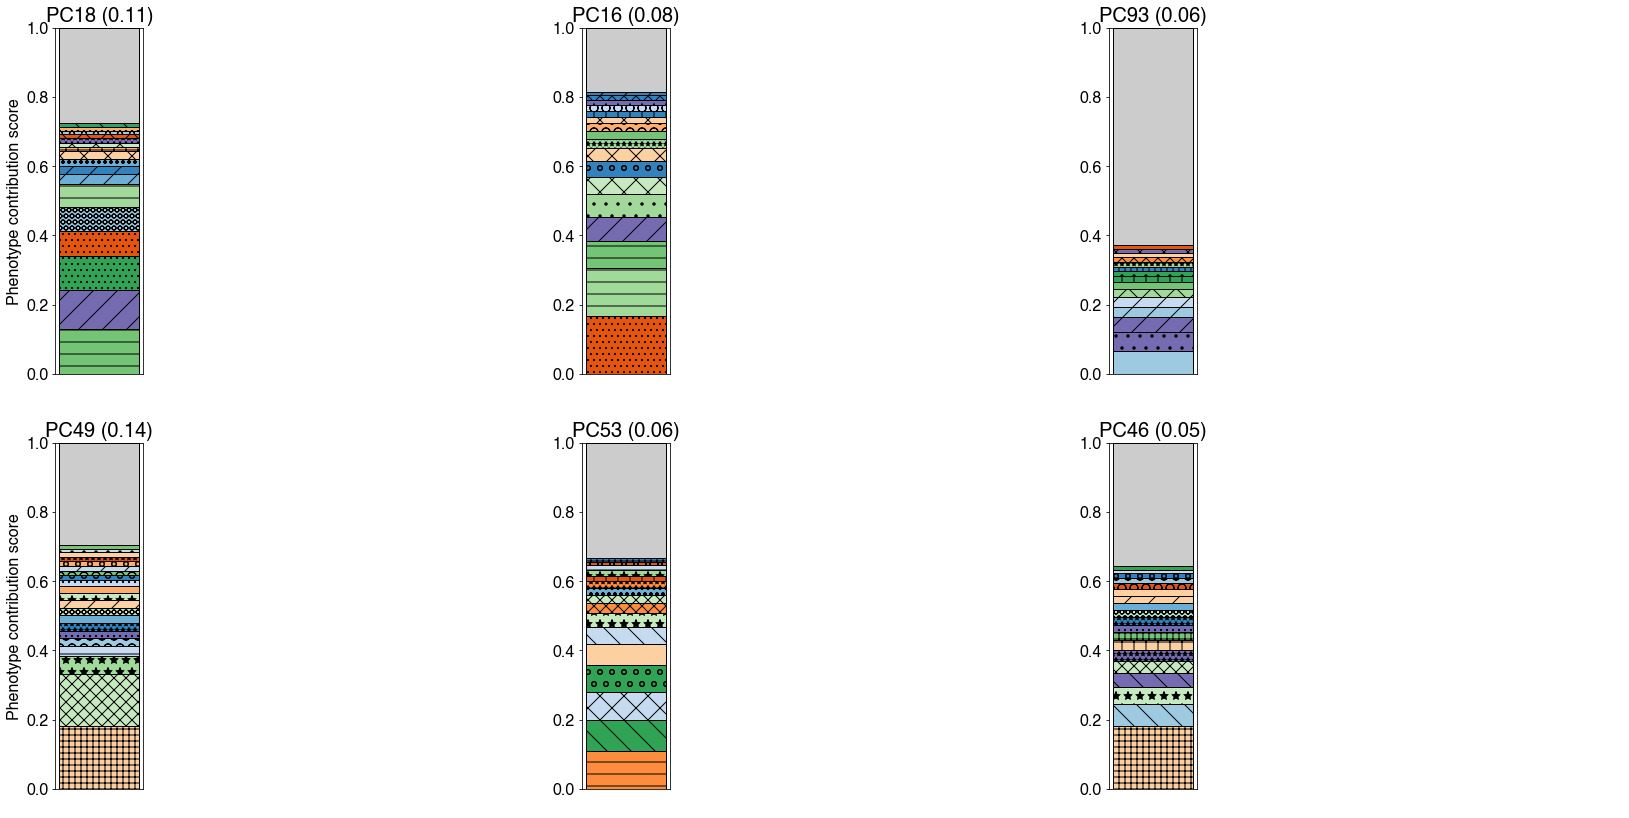

In [12]:
decomposition.plot_contribution_and_save(
    d = d_PTVs, 
    phe_or_gene = 'phe', 
    labels = labels_dict_MI_gallstones.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS9_MI_gallstones', 
    fig_spacing = 5, 
    contribution_thr=0.01, 
    pc_y_max = 1, 
    figsize=(28,14),
)